In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
from scipy.stats import pearsonr
from sklearn.kernel_ridge import KernelRidge
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
df = pd.read_csv('ttl_daily.csv', names=['date', 'cnt']).ix[1:,:]
# print(df.head())

df['date'] = pd.to_datetime(df['date'])
# df = df.sort_values(by='date')

df['month'] = df.date.apply(lambda x: x.strftime('%Y-%m')) 
# print(df.head())

df = df.groupby(by='month').sum()
# df.head()

In [5]:
m_vals = df['cnt'].values
months = df.index.values

In [16]:
c = pd.read_excel('unemployment_rate.xlsx', sheetname='CPI', header=1)
c.head()

,Month,All items,Food,Food at home,Food away from home,Energy,Gasoline (all types),Electricity,Natural gas (piped),All items less food and energy,Commodities less food and energy commodities,Apparel,New vehicles,Medical care commodities,Services less energy services,Shelter,Medical care services,Education and communication
0,2006-01-01,0.040,0.026,0.024,0.030,0.248,0.274,0.150,0.345,0.021,0.001,-0.010,-0.004,0.038,0.029,0.026,0.041,0.027
1,2006-02-01,0.036,0.028,0.024,0.030,0.201,0.206,0.154,0.267,0.021,0.000,-0.018,-0.004,0.038,0.029,0.026,0.041,0.026
2,2006-03-01,0.034,0.026,0.022,0.031,0.173,0.170,0.149,0.219,0.021,0.003,-0.012,-0.002,0.041,0.028,0.025,0.041,0.026
3,2006-04-01,0.035,0.018,0.009,0.031,0.178,0.215,0.148,0.110,0.023,0.004,-0.002,-0.003,0.043,0.031,0.028,0.041,0.026
4,2006-05-01,0.042,0.019,0.008,0.032,0.236,0.334,0.130,0.100,0.024,0.003,0.000,-0.007,0.043,0.033,0.032,0.041,0.027


In [19]:
c_vals = c["All items"].values.flatten()
c_vals

array([ 0.04 ,  0.036,  0.034,  0.035,  0.042,  0.043,  0.041,  0.038,
        0.021,  0.013,  0.02 ,  0.025,  0.021,  0.024,  0.028,  0.026,
        0.027,  0.027,  0.024,  0.02 ,  0.028,  0.035,  0.043,  0.041,
        0.043,  0.04 ,  0.04 ,  0.039,  0.042,  0.05 ,  0.056,  0.054,
        0.049,  0.037,  0.011,  0.001,  0.   ,  0.002, -0.004, -0.007,
       -0.013, -0.014, -0.021, -0.015, -0.013, -0.002,  0.018,  0.027,
        0.026,  0.021,  0.023,  0.022,  0.02 ,  0.011,  0.012,  0.011,
        0.011,  0.012,  0.011,  0.015,  0.016,  0.021,  0.027,  0.032,
        0.036,  0.036,  0.036,  0.038,  0.039,  0.035,  0.034,  0.03 ,
        0.029,  0.029,  0.027,  0.023,  0.017,  0.017,  0.014,  0.017,
        0.02 ,  0.022,  0.018,  0.017,  0.016,  0.02 ,  0.015,  0.011,
        0.014,  0.018,  0.02 ,  0.015,  0.012,  0.01 ,  0.012,  0.015,
        0.016,  0.011,  0.015,  0.02 ,  0.021,  0.021,  0.02 ,  0.017,
        0.017,  0.017,  0.013,  0.008, -0.001,  0.   , -0.001, -0.002,
      

In [21]:
def normalize(vals):
    return (vals - np.mean(vals)) / np.std(vals)

In [22]:
m_vals = normalize(m_vals)
c_vals = normalize(c_vals)

In [23]:
len(m_vals), len(c_vals)

(120, 120)

In [28]:
x = np.arange(len(m_vals))
X = np.arange(len(m_vals)).reshape([-1,1])

def smooth(x, y, nb):
    y_smooth = np.zeros(x.shape[0])
    for i in range(len(x)):
        if i-nb < 0:
            y_smooth[i] = np.mean(y[:i+11])
        elif i+nb+1 > len(y):
            y_smooth[i] = np.mean(y[i-nb:])
        else:
            y_smooth[i] = np.mean(y[i-nb:i+nb+1])
    return y_smooth
            
            
m_smooth_avg = smooth(x, m_vals, 2)
smooth_cpi = smooth(x, c_vals, 1)

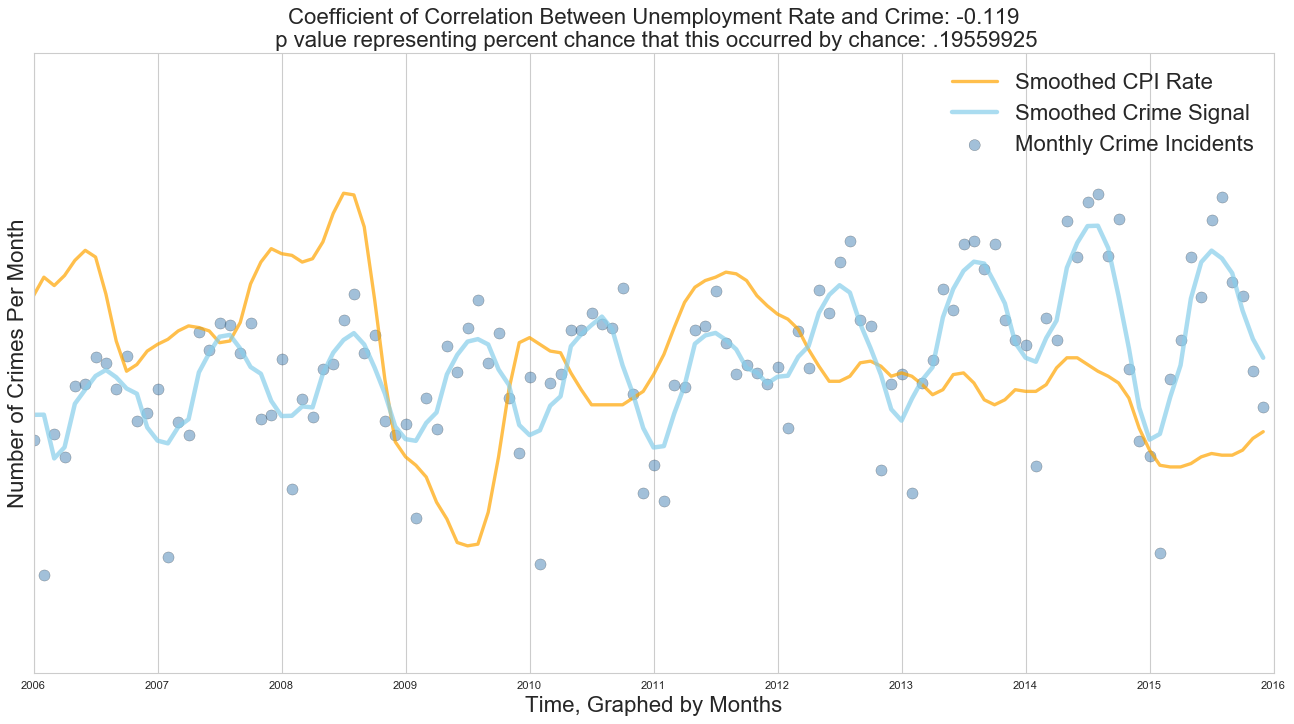

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(X, smooth_cpi, c='orange', linewidth=3, alpha=.7, label = 'Smoothed CPI Rate')

plt.scatter(X, m_vals, s=100, alpha=.5, c='steelblue', label = 'Monthly Crime Incidents')

plt.plot(X, m_smooth_avg, c='skyblue', alpha=.7, linewidth=4, label = 'Smoothed Crime Signal')

plt.xlim(xmin=0, xmax=len(m_vals))
plt.ylim(ymin=-4, ymax=4)
plt.xticks(np.arange(0, 121, 12).tolist(), np.arange(2006, 2017).tolist())
plt.yticks([])

coef, p_value = pearsonr(c_vals, m_vals)

plt.ylabel('Number of Crimes Per Month', fontsize = 20)
plt.xlabel('Time, Graphed by Months', fontsize = 20)
# plt.title('NYC Crime Over Time', fontsize = 30)
plt.title('Coefficient of Correlation Between Unemployment Rate and Crime: ' + str(np.round(coef, 3)) + 
         '\n p value representing percent chance that this occurred by chance: ' + str(np.array([p_value]))[3:-1],
          fontsize=20)
plt.legend(fontsize = 20, loc=0)

plt.show()

In [25]:
m_vals.min()

-2.7405656413578292

In [27]:
# str(np.array([p_value]))[3:-1]

---

## CPI and Highly Correlated Crime Types

In [159]:
df_kycdMonth = pd.read_csv('kycd_monthly.csv')
df_kycdMonth.columns = ['Month', 'KYCD', 'Count']

In [160]:
df_of = pd.read_csv('kycd_OfnsDesc.csv')

arr = df_of.sort_values(by='Counts', ascending=False).KY_CD.values
arr

array([341, 578, 344, 351, 109, 235, 361, 105, 107, 106, 126, 110, 359,
       347, 236, 121, 352, 117, 348, 112, 118, 113, 233, 340, 232, 358,
       360, 114, 353, 104, 355, 116, 365, 343, 111, 678, 364, 101, 125,
       343, 238, 231, 124, 350, 126, 675, 345, 342, 572, 363, 346, 356,
       364, 120, 230, 677, 678, 571, 237, 122, 115, 345, 234, 354, 102,
       364, 344, 578, 455, 106, 119, 349, 366, 361, 103, 676, 360, 120,
       672, 685, 460, 359, 881, 233, 357, 235, 351, 341, 109, 356, 236,
       112, 677, 352, 121, 675, 117, 123, 364, 577, 362, 340, 347, 116,
       105, 355, 343, 124, 124, 365, 348, 358, 124, 125, 366, 232, 113,
       237, 111, 350, 107, 230])

In [161]:
dic1 = {}
for code in arr:
    dic1[code] = smooth(x, normalize(df_kycdMonth[df_kycdMonth.KYCD==code].Count.values), 1)

/Users/Viola/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Viola/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Viola/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/Viola/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/Viola/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/Viola/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelap

In [175]:
coefs = []
p_values = []

for k, v in dic1.items():
    coef, p_value = pearsonr(c_vals, v)
    coefs.append([k, coef])

coefs.sort()
coefs

[[101, nan],
 [102, nan],
 [103, nan],
 [104, 0.2232002286904044],
 [105, 0.21715703071753731],
 [106, -0.33214873881161083],
 [107, 0.39441833566509532],
 [109, -0.10703335119832151],
 [110, 0.4294337102004952],
 [111, 0.14142002313516186],
 [112, 0.50099353410768777],
 [113, 0.076971712107007248],
 [114, -0.33601547478951604],
 [115, nan],
 [116, 0.080517772770638818],
 [117, 0.30580851648407437],
 [118, -0.51206571580199578],
 [119, nan],
 [120, nan],
 [121, -0.20633668404410924],
 [122, nan],
 [123, nan],
 [124, 0.38134535422050936],
 [125, -0.47033787840806129],
 [126, -0.40073475966483441],
 [230, nan],
 [231, -0.32813918039086976],
 [232, 0.16093285663461801],
 [233, -0.035038381470901506],
 [234, nan],
 [235, 0.024199857113505967],
 [236, -0.024205693405682158],
 [237, nan],
 [238, -0.12705612703701183],
 [340, -0.34789536195826687],
 [341, -0.18003758535619405],
 [342, nan],
 [343, -0.46831476307374476],
 [344, -0.32929151817894864],
 [345, nan],
 [346, nan],
 [347, -0.0534521

In [194]:
criminal_kycds = [112, 110, 107, 124]

# criminal_kycds = [117, 361, 351, 364, 104, 105] 
DF = df_of[df_of.KY_CD.isin(criminal_kycds)]
DF

,KY_CD,OFNS_DESC,Counts
8,107,NaN,1
9,107,BURGLARY,191406
12,110,GRAND LARCENY OF MOTOR VEHICLE,102061
15,112,NaN,6
16,112,THEFT-FRAUD,56762
33,124,NaN,1
34,124,KIDNAPPING,2
35,124,KIDNAPPING & RELATED OFFENSES,2300
36,124,KIDNAPPING AND RELATED OFFENSES,2


In [203]:
dic = {}
for code in criminal_kycds:
    dic[code] = smooth(x, normalize(df_kycdMonth[df_kycdMonth.KYCD==code].Count.values), 1)

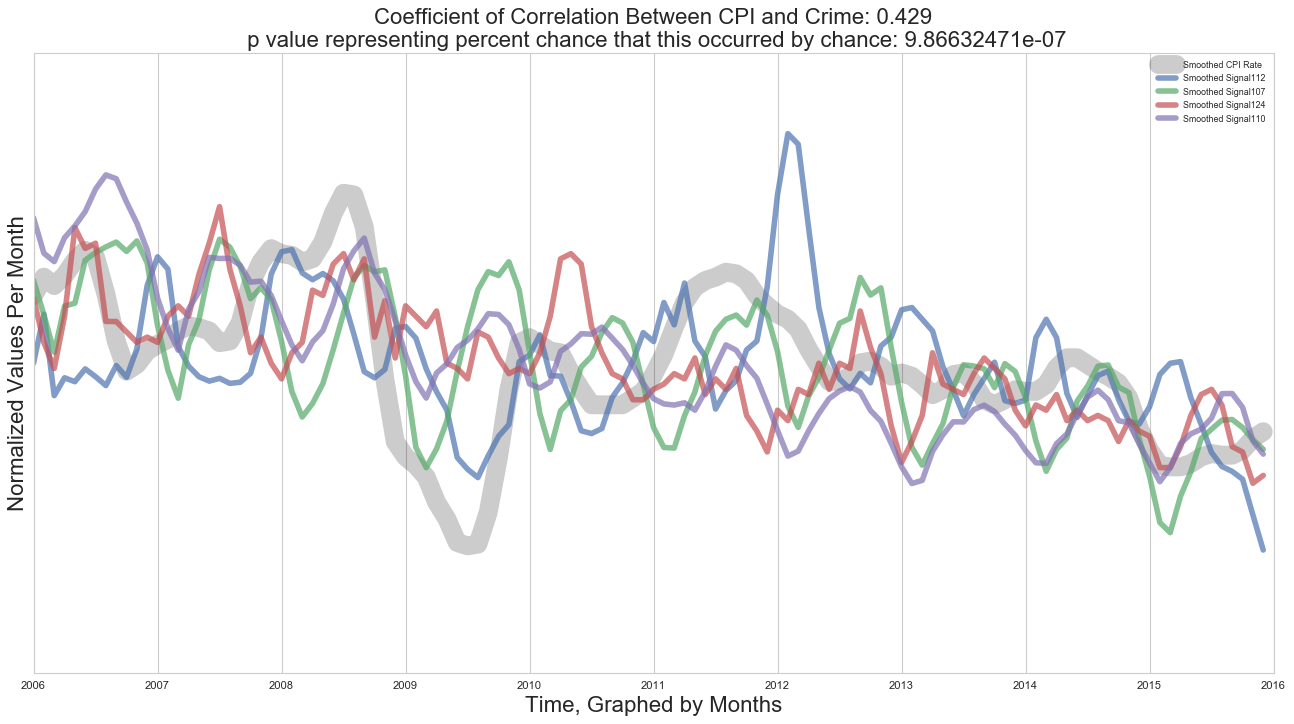

In [206]:
plt.figure(figsize=(20, 10))
plt.plot(X, smooth_cpi, c='black', linewidth=17, alpha=.2, label = 'Smoothed CPI Rate')

# plt.scatter(X, m_vals, s=100, alpha=.5, c='steelblue', label = 'Monthly Crime Incidents')
# plt.plot(X, m_smooth_avg, c='skyblue', alpha=.7, linewidth=4, label = 'Smoothed Crime Signal')

for k, v in dic.items():
    plt.plot(X, v, alpha=.7, linewidth=5, label = 'Smoothed Signal'+str(k))
    coef, p_value = pearsonr(c_vals, v)
    coefs.append(coef)


plt.xlim(xmin=0, xmax=len(m_vals))
plt.ylim(ymin=-4, ymax=4)
plt.xticks(np.arange(0, 121, 12).tolist(), np.arange(2006, 2017).tolist())
plt.yticks([])

# coef, p_value = pearsonr(c_vals, m_vals)

plt.ylabel('Normalized Values Per Month', fontsize = 20)
plt.xlabel('Time, Graphed by Months', fontsize = 20)
# plt.title('NYC Crime Over Time', fontsize = 30)
plt.title('Coefficient of Correlation Between CPI and Crime: ' + str(np.round(coef, 3)) + 
         '\n p value representing percent chance that this occurred by chance: ' + str(np.array([p_value]))[3:-1],
          fontsize=20)
plt.legend(fontsize = 8, loc=0)

plt.show()

### About Statistical correlations of criminal behaviour

https://en.wikipedia.org/wiki/Statistical_correlations_of_criminal_behaviour